# NLP Essentials

## Importing Essential Libraries

In [266]:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords

## Reading Text Data

In [131]:
# Reading text data 
raw_data = open('SMSSpamCollection.tsv', encoding='utf-8').read()

# printing the first 500 characters of the text data
raw_data[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [132]:
# Parsing the text data
parsed_data = raw_data.replace('\t', '\n').split('\n')

#Printing the parse data
parsed_data[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [133]:
# Extracting the labels from the text data

labels = parsed_data[0::2]
labels[0:5]

['ham', 'spam', 'ham', 'ham', 'ham']

In [134]:
# Extracting the text data 
text_list = parsed_data[1::2]
text_list[0:5]

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [135]:
# Labels seem to have one extra element
print(len(labels))
print(len(text_list))

5571
5570


In [136]:
# Checking labels for one extra element

# We can see that the label list has one empty element at the end of the list
labels[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [137]:
# Dropping the last element from label list
labels.pop()

# Checking
labels[-5:]

['spam', 'ham', 'ham', 'ham', 'ham']

### Converting the data to a dataframe

In [138]:
# Converting the list of text data and labels to a single dataframe

full_corpus = pd.DataFrame({
    'label': labels,
    'body_list': text_list
})

full_corpus.head()

,label,body_list
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Reading the data easily using pandas

In [184]:
full_pd_corpus = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
full_pd_corpus.columns = ['labels', 'text_data']

In [185]:
full_pd_corpus.head()

,labels,text_data
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [186]:
# Copying the data for later use
body_text = full_pd_corpus.copy()

### Exploring the dataset

In [141]:
# Shape of the data

# (rows, columns)
full_pd_corpus.shape

(5568, 2)

In [142]:
# Proportions of spam and ham 
full_pd_corpus['labels'].value_counts()

ham     4822
spam     746
Name: labels, dtype: int64

In [143]:
# Check if there are any missing values 

# As shown here, there are no missing values
full_pd_corpus.isnull().sum()

labels       0
text_data    0
dtype: int64

## Regular Expressions

In [144]:
re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

In [145]:
# Splitting a sentence into a list of words
# '/s' . - looking for a single whitespaces

re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [146]:
re.split('\s', re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [147]:
# '/s+' . - Looking for more than single white space
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [148]:
re.split('\s', re_test_messy1) 

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [149]:
# '\W+' - search for a non word charachter to define a split point
re.split('\W+', re_test_messy1) 

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [150]:
# Search for the words instead of the splitting elements
# \S+  - search for one or more non white space characters
re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [151]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [152]:
# Search for one of more non white space characters
re.findall('\S+', re_test_messy1)

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [153]:
# \w+ .  - looks for one or more word characters
re.findall('\w+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

### Replacing a specific string

In [154]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [155]:
# Search only small letters
re.findall('[a-z]+', pep8_test)

['try', 'to', 'follow', 'guidelines']

In [156]:
# Search only capital letters
re.findall('[A-Z]+', pep8_test)

['I', 'PEP']

In [157]:
# Search capital letters with numbers
re.findall('[A-Z]+[0-9]+', pep8_test)

['PEP8']

In [158]:
# Search capital letters with numbers
re.findall('[A-Z]+[0-9]+', pep7_test)

['PEP7']

In [159]:
# Search capital letters with numbers
re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

In [160]:
# substuting text data
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [161]:
# substuting text data
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep7_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [162]:
# substuting text data
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', peep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

# Preprocessing Text Data

### Removing Punctuation

In [163]:
pd.set_option('display.max_colwidth', 100)
full_pd_corpus.head()

,labels,text_data
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [164]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [165]:
# Function to remove punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [166]:
full_pd_corpus['no_punct_text'] = full_pd_corpus['text_data'].apply(lambda x: remove_punct(x))
full_pd_corpus.head()

,labels,text_data,no_punct_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


## Tokenization

In [113]:
# A function to tokenize the text data
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [114]:
full_pd_corpus['body_text_tokenized'] = full_pd_corpus['no_punct_text'].apply(lambda x: tokenize(x.lower()))
full_pd_corpus.head()

,labels,text_data,no_punct_text,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


## Remove Stopwords


In [115]:
stopword = nltk.corpus.stopwords.words('english')
stopword[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [116]:
def remove_stopwords(text):
    no_stop_words = [word for word in text if word not in stopword]
    return no_stop_words

In [117]:
full_pd_corpus['text_nostopwords'] = full_pd_corpus['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
full_pd_corpus.head()

,labels,text_data,no_punct_text,body_text_tokenized,text_nostopwords
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


# Stemming 

#### Porter Stemmer

In [118]:
ps = nltk.PorterStemmer()

In [119]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [120]:
# Checking porter stemmer
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [121]:
# Checking porter stemmer
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


In [167]:
full_corpus.head()

,label,body_list
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [170]:
# A comprehensive function to clean the text
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopword]
    return text

In [171]:
full_corpus['clean_body_text'] = full_corpus['body_list'].apply(lambda x: clean_text(x.lower()))
full_corpus.head()

,label,body_list,clean_body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


In [172]:
# steming function
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [173]:
full_corpus['body_text_stemmed'] = full_corpus['clean_body_text'].apply(lambda x: stemming(x))

full_corpus.head()

,label,body_list,clean_body_text,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"


## Lemmatizing

### Wordnet Lemmatizer

In [174]:
# Defining a lemmatizer

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [175]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [176]:
# checking more stemming 
print(ps.stem('meaning'))
print(ps.stem('meanness'))

mean
mean


In [178]:
# Checking lemmatizer
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [179]:
# checking more stemming 
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [180]:
# Checking lemmatizer
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [181]:
# Applying lemmatizer to the cleaned text body
def lemmaztize(text):
    lem = [wn.lemmatize(word) for word in text]
    return lem

In [182]:
full_corpus['lemmatized_textbody'] = full_corpus['clean_body_text'].apply(lambda x: lemmaztize(x))

full_corpus.head()

,label,body_list,clean_body_text,body_text_stemmed,lemmatized_textbody
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]"


# Vectorizing

In [229]:
# A function to clean the dataset
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopword]
    stemmed = [ps.stem(word) for word in text]
    return stemmed

In [202]:
body_text.head()

,labels,text_data
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## Count Vectorization

In [203]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(body_text['text_data'])

# Shape of the vectorized data
print(X_counts.shape)

(5568, 8337)


In [204]:
# Printing all the features
print(count_vect.get_feature_names()[0:50])

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx']


In [212]:
# Count vectorizer output is a sparse matrix
X_counts

<5568x8337 sparse matrix of type '<class 'numpy.int64'>'
	with 55740 stored elements in Compressed Sparse Row format>

In [214]:
# Changing a sparse matrix to a dataframe

X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8327,8328,8329,8330,8331,8332,8333,8334,8335,8336
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# Fixing the column names into the dataframe

X_counts_df.columns = count_vect.get_feature_names()
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zoe,zogtoriu,zoom,zouk,zyada,Ü,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# N-Grams Vectorization

In [220]:
# Cleaning text data for N-Grams

def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join(ps.stem(word) for word in tokens if word not in stopword)
    return text

In [221]:
text_corpus = body_text.copy()

In [222]:
text_corpus['cleaned_text'] = text_corpus['text_data'].apply(lambda x: clean_text(x))
text_corpus.head()

,labels,text_data,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive search right word thank breather I promis wont take help grant fulfil promis you wonder bles...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win FA cup final tkt 21st may 2005 text FA 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah I dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak they treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I have A date ON sunday with will


### Apply N-Gram Vectorizer

In [226]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(text_corpus['cleaned_text'])

print(X_counts.shape)
print(ngram_vect.get_feature_names()[0:10])

(5568, 34129)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '020603 thi', '0207 153']


In [227]:
# The output is sparse matrix
X_counts

<5568x34129 sparse matrix of type '<class 'numpy.int64'>'
	with 48076 stored elements in Compressed Sparse Row format>

In [228]:
# transforming a sparse matrix into dataframe
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names()
X_counts_df.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,020603 thi,0207 153,...,zoe 18,zoe it,zogtoriu stare,zoom cine,zouk with,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Equation

In [242]:
# A function to clean the dataset for TF-IDF
def clean_text_data(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text_data)
X_tfidf = tfidf_vect.fit_transform(body_text['text_data'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names()[0:20])

(5568, 8337)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06']


In [244]:
# output of the vectorizer is a sparse matrix
X_tfidf

<5568x8337 sparse matrix of type '<class 'numpy.float64'>'
	with 55740 stored elements in Compressed Sparse Row format>

In [245]:
# transfroming a sparse matrix into a dataframe

X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_counts_df.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,020603 thi,0207 153,...,zoe 18,zoe it,zogtoriu stare,zoom cine,zouk with,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

In [252]:
# copying the dataset for convenience
text_body = body_text.copy()

#### Length of Text Data

In [253]:
text_body['body_len'] = text_body['text_data'].apply(lambda x: len(x) - x.count(" "))
text_body.head()

,labels,text_data,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


#### Percentage of Punctuation Marks

In [260]:
# a function to count number of punctuation

def punct_num(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/ (len(text) - text.count(" ")),3)*100

In [262]:
text_body['punct%'] = text_body['text_data'].apply(lambda x: punct_num(x))
text_body.head()

,labels,text_data,body_len,punct_count,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,7.1


## Feature Evaluation

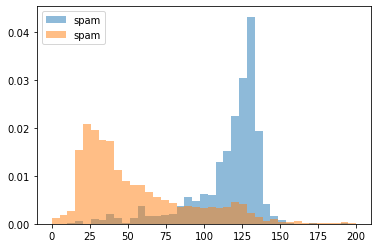

In [267]:
# Evaluating body length feature

bins = np.linspace(0,200,40)

plt.hist(text_body[text_body['labels'] == 'spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
plt.hist(text_body[text_body['labels'] == 'ham']['body_len'], bins, alpha=0.5, normed=True, label='spam')

plt.legend(loc= 'upper left')
plt.show()

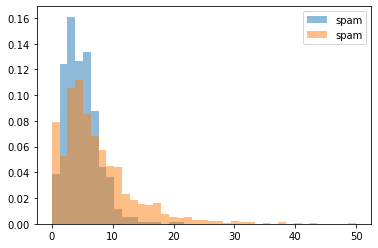

In [269]:
# Evaluating punctuation %

bins = np.linspace(0,50,40)

plt.hist(text_body[text_body['labels'] == 'spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
plt.hist(text_body[text_body['labels'] == 'ham']['punct%'], bins, alpha=0.5, normed=True, label='spam')

plt.legend(loc= 'upper right')
plt.show()

## Feature Transformation

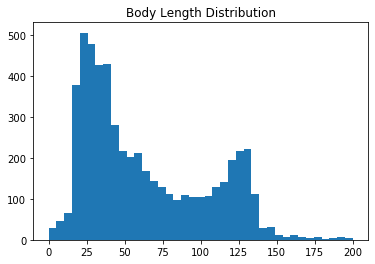

In [274]:
# Checking body length distribution
bins = np.linspace(0,200, 40)
plt.hist(text_body['body_len'], bins)
plt.title("Body Length Distribution")
plt.show()

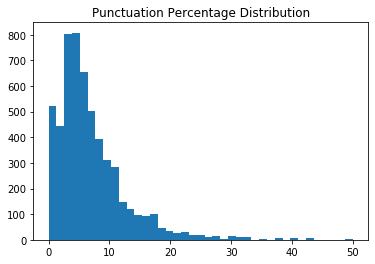

In [276]:
# Checking body length distribution

# A good candidate for transformation

bin = np.linspace(0,50,40)
plt.hist(text_body['punct%'], bin)
plt.title("Punctuation Percentage Distribution")
plt.show()

### Applying transformation  - Box Cox Transformation

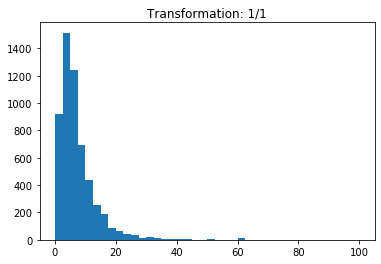

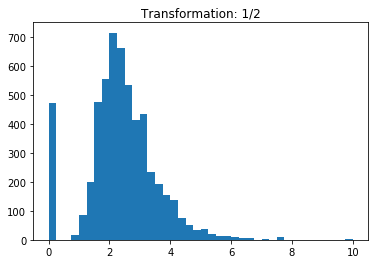

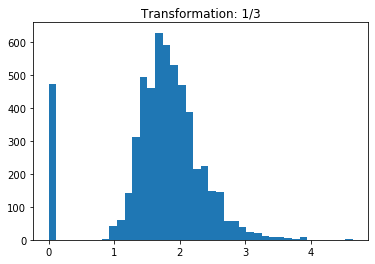

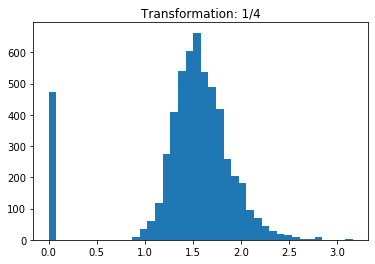

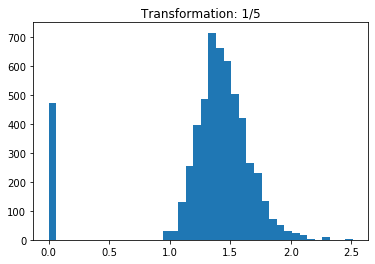

In [278]:
for i in [1,2,3,4,5]:
    plt.hist((text_body['punct%'])**(1/i), bins=40)
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()